### Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Import dataset

Dataset Link: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand)

In [2]:
df=pd.read_csv("Live.csv")
df.shape

(7050, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [5]:
#df.mean()
df.var()

C:\Users\subhi\AppData\Local\Temp\ipykernel_24228\2418068698.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


num_reactions    214022.176652
num_comments     791453.670644
num_shares        17318.550917
num_likes        202025.399758
num_loves          1597.835141
num_wows             76.032303
num_hahas            15.659301
num_sads              2.550907
num_angrys            0.528256
Column1                    NaN
Column2                    NaN
Column3                    NaN
Column4                    NaN
dtype: float64

### Data Cleaning

In [6]:
df.drop_duplicates(inplace=True) #dropping the duplicates

In [7]:
df.isnull().sum() #checking how many null values are there in each columns

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6999
Column2             6999
Column3             6999
Column4             6999
dtype: int64

In [8]:
# Removing the last four columns as they  contain null values
# Removing the status id column

df.drop(columns=["Column1","Column2","Column3","Column4","status_id"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6999 non-null   object
 1   status_published  6999 non-null   object
 2   num_reactions     6999 non-null   int64 
 3   num_comments      6999 non-null   int64 
 4   num_shares        6999 non-null   int64 
 5   num_likes         6999 non-null   int64 
 6   num_loves         6999 non-null   int64 
 7   num_wows          6999 non-null   int64 
 8   num_hahas         6999 non-null   int64 
 9   num_sads          6999 non-null   int64 
 10  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 656.2+ KB


In [9]:
# There are now two categorical columns. Exploring them one by one
print(len(df["status_type"].unique()))
print(len(df["status_published"].unique()))

print(df["status_type"].unique())
print(df["status_published"].unique()) #kind of date and time column

4
6913
['video' 'photo' 'link' 'status']
['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']


In [10]:
status=['video','photo']
filtered=df[df['status_type'].isin(status)]
filtered

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


### Data Preprocessing

Converting status_type categorical column into numerical column.

Label Encoding:Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

GfG link: [Label Encoding in Pyton](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)

Sklearn link: [sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [11]:
data=df.copy()
le=LabelEncoder()

data['status_type'] = le.fit_transform(data['status_type']) #fit_transform fits label encoder and returns encoded labels
data.info()

y=data['status_type'] #true labels
print(df["status_type"].unique())
print(data["status_type"].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6999 non-null   int32 
 1   status_published  6999 non-null   object
 2   num_reactions     6999 non-null   int64 
 3   num_comments      6999 non-null   int64 
 4   num_shares        6999 non-null   int64 
 5   num_likes         6999 non-null   int64 
 6   num_loves         6999 non-null   int64 
 7   num_wows          6999 non-null   int64 
 8   num_hahas         6999 non-null   int64 
 9   num_sads          6999 non-null   int64 
 10  num_angrys        6999 non-null   int64 
dtypes: int32(1), int64(9), object(1)
memory usage: 628.8+ KB
['video' 'photo' 'link' 'status']
[3 1 0 2]


Converting status_published categorical column into datetime

When a CSV file is imported and a Data Frame is made, the Date time objects in the file are read as a string object rather than a Date Time object.

Pandas to_datetime() method helps to convert string Date time into Python Date time object.

GfG link: [Pandas.to_datetime()](https://www.geeksforgeeks.org/python-pandas-to_datetime/)

After converting string Date time into python Date time object, extract year, month, weekday and hour.

GfG links: 
- [PandasSeries.dt.year](https://www.geeksforgeeks.org/python-pandas-series-dt-year/)
- [PandasSeries.dt.month](https://www.geeksforgeeks.org/python-pandas-series-dt-month/)
- [PandasSeries.dt.dayofweek](https://www.geeksforgeeks.org/python-pandas-series-dt-dayofweek/)
- [PandasSeries.dt.hour](https://www.geeksforgeeks.org/python-pandas-series-dt-month/)

In [12]:
data['status_published'] = pd.to_datetime(data['status_published'])

In [13]:
data['year'] = data['status_published'].dt.year
data['month'] = data['status_published'].dt.month
data['dayofweek'] = data['status_published'].dt.dayofweek # 0 is Monday, 7 is Sunday.
data['hour'] = data['status_published'].dt.hour

In [14]:
data

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,2016,9,5,2
7046,1,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,2016,9,4,11
7047,1,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,2016,9,2,23
7048,1,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,2016,9,1,0


In [15]:
reaction=df.columns[2:12] # engagement metrics
reaction

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

### Dividing and analysing the data of before 2015 and after 2015

According to an [article](https://www.google.com/search?q=facebook+live+was+launched&rlz=1C1VDKB_enIN964IN964&oq=facebook+live+was+launched&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIICAEQABgWGB4yDQgCEAAYhgMYgAQYigXSAQg1OTk2ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8) facebook live was launched in August 2015.

In [16]:
before2015 = data[data['year']<=2015]
after2015 = data[data['year']>2015]

print(before2015.shape)
print(after2015.shape)

(1659, 15)
(5340, 15)


In [17]:
before2015_video=before2015[before2015["status_type"]==3].shape[0]#the 3 label was given to video by label encoder
before2015_photo=before2015[before2015["status_type"]==1].shape[0]#the 1 label was given to photo
before2015_link=before2015[before2015["status_type"]==0].shape[0]#the 0 label was given to link
before2015_status=before2015[before2015["status_type"]==2].shape[0]#the 2 label was given to status

print("Total number of video content before 2015 is:", before2015_video)
print("Total number of photo content before 2015 is:", before2015_photo)
print("Total number of links before 2015 is:", before2015_link)
print("Total number of status before 2015 is:", before2015_status)

Total number of video content before 2015 is: 343
Total number of photo content before 2015 is: 1220
Total number of links before 2015 is: 15
Total number of status before 2015 is: 81


In [18]:
after2015_video=after2015[after2015["status_type"]==3].shape[0]#the 3 label was given to video by label encoder
after2015_photo=after2015[after2015["status_type"]==1].shape[0]#the 1 label was given to photo
after2015_link=after2015[after2015["status_type"]==0].shape[0]#the 0 label was given to link
after2015_status=after2015[after2015["status_type"]==2].shape[0]#the 2 label was given to status

print("Total number of video content after 2015 is:", after2015_video)
print("Total number of photo content after 2015 is:", after2015_photo)
print("Total number of links after 2015 is:", after2015_link)
print("Total number of status after 2015 is:", after2015_status)

Total number of video content after 2015 is: 1990
Total number of photo content after 2015 is: 3024
Total number of links after 2015 is: 48
Total number of status after 2015 is: 278


In [19]:
before2015[reaction].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.0,1659.0,1659.0,1659.0,1659.0
mean,433.142254,13.895720,2.652200,433.142254,0.0,0.0,0.0,0.0,0.0
std,733.345816,37.182147,11.795102,733.345816,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,20.500000,2.000000,0.000000,20.500000,0.0,0.0,0.0,0.0,0.0
50%,51.000000,6.000000,0.000000,51.000000,0.0,0.0,0.0,0.0,0.0
75%,440.000000,13.000000,1.000000,440.000000,0.0,0.0,0.0,0.0,0.0
max,4710.000000,509.000000,122.000000,4710.000000,0.0,0.0,0.0,0.0,0.0


In [20]:
after2015[reaction].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,5340.000000,5340.00000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000
mean,160.328464,291.30824,51.941948,140.605618,16.713109,1.642135,0.914794,0.304869,0.144382
std,290.133514,1012.89997,149.114896,256.789523,45.190381,9.957591,4.524314,1.689166,0.785198
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,3.00000,0.000000,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,199.000000,51.00000,9.250000,165.000000,7.000000,1.000000,0.000000,0.000000,0.000000
max,4410.000000,20990.00000,3424.000000,4315.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Let us draw a comparison for engagement metrics for data before2015 and after2015

Pandas grouby() is used to group the data accordingly to the function used.

GfG link: [Pandas groupby](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/)

In [21]:
before2015.groupby('status_type')[reaction].count()

#In the below table each row indicates the number of posts for each status type for data before 2015
#We can see that number of photo content (i.e label 1) is more as compared to other posts type.

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,15,15,15,15,15,15,15,15,15
1,1220,1220,1220,1220,1220,1220,1220,1220,1220
2,81,81,81,81,81,81,81,81,81
3,343,343,343,343,343,343,343,343,343


In [22]:
after2015.groupby('status_type')[reaction].count()

#In the below table each row indicates the number of posts for each status type for data after 2015
#We can see that number of photo content (i.e label 1) is more as compared to other posts type.

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,48,48,48,48,48,48,48,48,48
1,3024,3024,3024,3024,3024,3024,3024,3024,3024
2,278,278,278,278,278,278,278,278,278
3,1990,1990,1990,1990,1990,1990,1990,1990,1990


We can observe that after facebook live got launched the number of posts for each status type has increased.

In [23]:
before2015.groupby('status_type')[reaction].sum()

#In the below table each row indicates the total number of engagements for each status type for data before 2015.

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,20786,199,53,20786,0,0,0,0,0
1,355565,13668,1949,355565,0,0,0,0,0
2,103263,2500,458,103263,0,0,0,0,0
3,238969,6686,1940,238969,0,0,0,0,0


In [24]:
after2015.groupby('status_type')[reaction].sum()

#In the below table each row indicates the total number of engagements for each status type for data after 2015.

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,2533,160,224,2500,19,12,2,0,0
1,375807,52010,8625,365925,5748,2623,793,536,169
2,55681,10578,467,54534,549,423,40,126,9
3,422133,1492838,268054,327875,82932,5711,4050,966,593


In [36]:
before2015.groupby('status_type')[reaction].mean()
#If we see that average number of each engagement metric is greater for video content(i.e label 3) compared 
#to photo posts (i.e. label 1)

# 696.7 signifies that on an average the number of reactions per video post was 696.7

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,1385.733333,13.266667,3.533333,1385.733333,0.0,0.0,0.0,0.0,0.0
1,291.446721,11.203279,1.597541,291.446721,0.0,0.0,0.0,0.0,0.0
2,1274.851852,30.864198,5.654321,1274.851852,0.0,0.0,0.0,0.0,0.0
3,696.702624,19.492711,5.655977,696.702624,0.0,0.0,0.0,0.0,0.0


In [26]:
after2015.groupby('status_type')[reaction].mean() #same observation

#If we see that average number of each engagement metric is greater for video posts (i.e label 3) compared 
#to photo posts (i.e. label 1).

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,52.770833,3.333333,4.666667,52.083333,0.395833,0.250000,0.041667,0.000000,0.000000
1,124.274802,17.199074,2.852183,121.006944,1.900794,0.867394,0.262235,0.177249,0.055886
2,200.291367,38.050360,1.679856,196.165468,1.974820,1.521583,0.143885,0.453237,0.032374
3,212.127136,750.169849,134.700503,164.761307,41.674372,2.869849,2.035176,0.485427,0.297990


We can observe that engagements per video content is higher than the per photo content.

GfG links: 
- [Pandas dataframe corr() method](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/)
- [Seaborn Heatmap](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/)

For data before 2015 we can observe following things:
 - Since the total number of likes and reactions are exactly equal for each status type, the corrleation coefficient is one, which indicates a a perfect positive linear relationship between two variables. This means that as one variable increases, the other variable also increases in a consistent manner.  
- Shares and comments have strong correlation, i.e corrleation coefficient is 0.83.

For data after 2015 we can observe following things:
 - Since the total number of likes and reactions are almost equal for each status type, the corrleation coefficient is 0.99, which indicates a a strong positive linear relationship between two variables.   
- Loves and shares have strong correlation.
- Reactions and loves have a good corrleation, i.e corrleation coefficient is 0.65.
- Shares and comments have a good correlation, i.e corrleation coefficient is 0.63.

<Axes: >

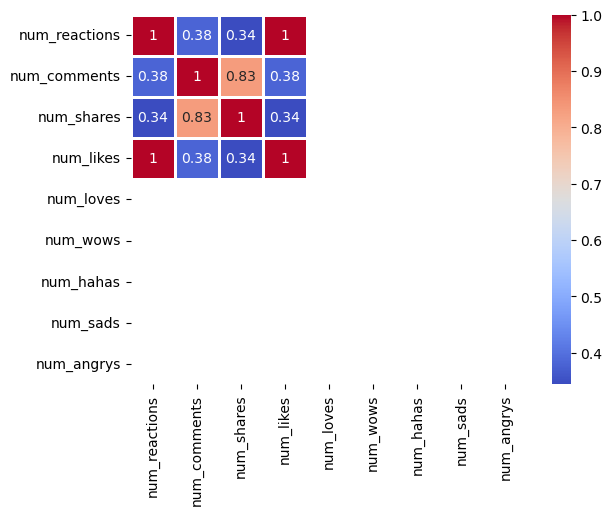

In [27]:
sns.heatmap(before2015[reaction].corr(), cmap='coolwarm',annot=True,linewidth=2)
#reaction is an array containing the names of engagement metrics defined above.

<Axes: >

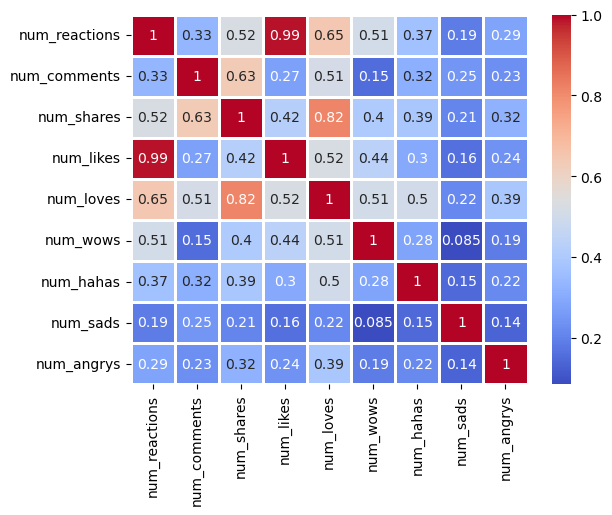

In [28]:
sns.heatmap(after2015[reaction].corr(),cmap='coolwarm',annot=True,linewidth=2)
#reaction is an array containing the names of engagement metrics defined above.

In [29]:
%store before2015

Stored 'before2015' (DataFrame)


In [30]:
%store after2015

Stored 'after2015' (DataFrame)


In [31]:
%store reaction

Stored 'reaction' (Index)
